# Machine Learning 

In [1]:
import pandas as pd 
con_belief = pd.read_csv('data/conspiracy_belief_score.csv')
con_belief.head()

,conspiracy_belief_score,education,childhood,gender,hand,family_size,age,test_time
0,4.333333,Less than high school,Suburban,Female,Right,1,14,125
1,2.466667,Graduate degree,Suburban,Female,Right,2,26,141
2,3.666667,University degree,Rural (country side),Male,Right,3,25,58
3,3.933333,High school,Suburban,Male,Right,2,37,105
4,1.000000,University degree,Rural (country side),Male,Right,2,34,87


In [2]:
con_belief.describe()

,conspiracy_belief_score,family_size,age,test_time
count,2301.000000,2301.000000,2301.000000,2301.000000
mean,2.887266,2.519774,27.621034,147.853542
std,1.033407,1.323426,13.312523,352.173772
min,0.866667,0.000000,13.000000,3.000000
25%,2.066667,2.000000,18.000000,82.000000
50%,2.866667,2.000000,22.000000,107.000000
75%,3.666667,3.000000,34.000000,141.000000
max,5.000000,19.000000,75.000000,9881.000000


In [10]:
import pandas_profiling

pandas_profiling.ProfileReport(con_belief)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
con_belife = pd.get_dummies(con_belief, drop_first = True)
con_belife.head()

,conspiracy_belief_score,family_size,age,test_time,education_High school,education_Less than high school,education_University degree,childhood_Suburban,"childhood_Urban (town, city)",gender_Male,gender_Other,hand_Right
0,4.333333,1,14,125,0,1,0,1,0,0,0,1
1,2.466667,2,26,141,0,0,0,1,0,0,0,1
2,3.666667,3,25,58,0,0,1,0,0,1,0,1
3,3.933333,2,37,105,1,0,0,1,0,1,0,1
4,1.000000,2,34,87,0,0,1,0,0,1,0,1


In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
# create our response array (univariate 'Series')

response_var = con_belife['conspiracy_belief_score']

# predictor 
predictor_vars = con_belife.drop(columns = 'conspiracy_belief_score')

In [15]:
response_var

0       4.333333
1       2.466667
2       3.666667
3       3.933333
4       1.000000
          ...   
2296    3.066667
2297    1.333333
2298    3.800000
2299    1.666667
2300    3.400000
Name: conspiracy_belief_score, Length: 2301, dtype: float64

In [16]:
predictor_vars

,family_size,age,test_time,education_High school,education_Less than high school,education_University degree,childhood_Suburban,"childhood_Urban (town, city)",gender_Male,gender_Other,hand_Right
0,1,14,125,0,1,0,1,0,0,0,1
1,2,26,141,0,0,0,1,0,0,0,1
2,3,25,58,0,0,1,0,0,1,0,1
3,2,37,105,1,0,0,1,0,1,0,1
4,2,34,87,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2296,3,32,116,0,0,1,0,1,1,0,1
2297,2,25,68,0,0,0,1,0,0,0,0
2298,2,34,100,1,0,0,0,1,0,0,1
2299,2,19,139,1,0,0,1,0,1,0,1


In [17]:
model = LinearRegression()

In [18]:
model.fit(predictor_vars, response_var)

LinearRegression()

In [19]:
model.score(predictor_vars, response_var)

0.040043284303887816

In [20]:
model.intercept_

2.397096757592804

In [23]:
col0 = model.coef_

Interpret the R-squared value
Interpret some of the coefficients. (Hint - think about how you could combine this array output with the column names to easily see which value corresponds to what variable in the data).

R = 40% correctly predictied 

In [24]:
col1 = predictor_vars.columns

In [28]:
df = pd.DataFrame({"co" : col0,
                   "var" : col1}).sort_values('co')
df

,co,var
8,-0.209622,gender_Male
6,-0.050352,childhood_Suburban
10,-0.025249,hand_Right
2,0.000105,test_time
9,0.005342,gender_Other
1,0.007398,age
0,0.038781,family_size
7,0.110445,"childhood_Urban (town, city)"
5,0.145234,education_University degree
4,0.332422,education_Less than high school


In [29]:
import statsmodels.api as sm

# add in the constant to the data
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars.head()

,const,family_size,age,test_time,education_High school,education_Less than high school,education_University degree,childhood_Suburban,"childhood_Urban (town, city)",gender_Male,gender_Other,hand_Right
0,1.0,1,14,125,0,1,0,1,0,0,0,1
1,1.0,2,26,141,0,0,0,1,0,0,0,1
2,1.0,3,25,58,0,0,1,0,0,1,0,1
3,1.0,2,37,105,1,0,0,1,0,1,0,1
4,1.0,2,34,87,0,0,1,0,0,1,0,1


In [30]:
sm_model = sm.OLS(response_var, predictor_vars).fit()
print(sm_model.summary())

                               OLS Regression Results                              
Dep. Variable:     conspiracy_belief_score   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     8.680
Date:                     Thu, 29 Sep 2022   Prob (F-statistic):           3.09e-15
Time:                             11:45:00   Log-Likelihood:                -3293.1
No. Observations:                     2301   AIC:                             6610.
Df Residuals:                         2289   BIC:                             6679.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [31]:
residuals = sm_model.fittedvalues - response_var 

<AxesSubplot:>

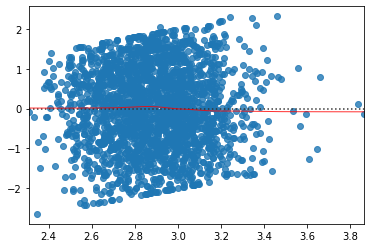

In [38]:
import seaborn as sns 
import matplotlib as plt 
sns.residplot(x = sm_model.fittedvalues, 
              y = residuals,
              lowess = True,
              line_kws = {'color' : 'red',
                          'lw' : 1,
                          'alpha' : 0.8})


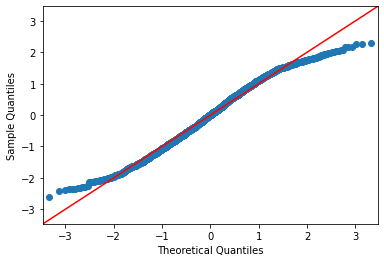

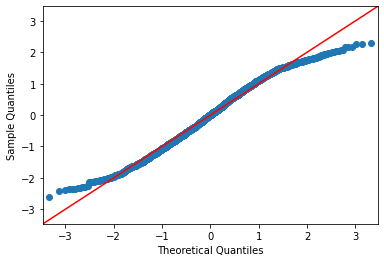

In [39]:
import scipy.stats as stats

sm.qqplot(residuals, dist=stats.t, fit=True, line='45')

In [40]:
loans = pd.read_csv("data/loans.csv")

In [41]:
pandas_profiling.ProfileReport(loans)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
loans.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid
4,3000.0,60 months,12.69,B,RENT,80000.0,other,Current


In [46]:
loans_clean = (
    loans
    .query('loan_status != "Current"')
    .copy()
)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid


In [47]:
loans_clean.isna().sum()

loan_amnt         5
term              5
int_rate          5
grade             0
home_ownership    5
annual_inc        9
purpose           5
loan_status       5
dtype: int64

In [48]:
loans_clean.dropna(inplace = True)

In [49]:
import numpy as np

In [50]:
loans_clean["paid"] = (
    np.where(loans_clean["loan_status"] == "Fully Paid", 1, 0)
)
loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid,1


In [51]:
loans_clean.drop(columns = "loan_status", inplace = True)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,1


In [52]:
loans_clean.loc[:,"log_inc"] = (
    np.log(loans_clean["annual_inc"])
)
loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,paid,log_inc
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,1,10.085809
1,2500.0,60 months,15.27,C,RENT,30000.0,car,0,10.308953
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,1,9.413444
3,10000.0,36 months,13.49,C,RENT,49200.0,other,1,10.803649
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,1,10.491274


In [53]:
loans_clean = pd.get_dummies(loans_clean, drop_first = True)
loans_clean.head()

,loan_amnt,int_rate,annual_inc,paid,log_inc,term_60 months,grade_B,grade_C,grade_D,grade_E,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,10.65,24000.0,1,10.085809,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,30000.0,0,10.308953,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,12252.0,1,9.413444,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,49200.0,1,10.803649,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,7.90,36000.0,1,10.491274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
loans_predictors = loans_clean.drop(columns = 'paid')
loans_response = loans_clean['paid']

In [56]:
from sklearn.model_selection import train_test_split

In [61]:
loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = (
    train_test_split(
        loans_predictors,
        loans_response,
        test_size = 0.1,
        random_state = 7)
)

In [62]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(loans_pred_train, loans_resp_train)
model.score(loans_pred_train, loans_resp_train)

0.797325020648496

In [63]:
loans_clean.describe()

,loan_amnt,int_rate,annual_inc,paid,log_inc,term_60 months,grade_B,grade_C,grade_D,grade_E,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,41704.000000,41704.000000,4.170400e+04,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,...,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000,41704.000000
mean,10962.039613,12.107992,6.898937e+04,0.797909,10.967611,0.243957,0.290859,0.205040,0.140298,0.078482,...,0.075221,0.009975,0.054911,0.017816,0.014987,0.103443,0.002518,0.046566,0.009519,0.023739
std,7326.938957,3.687395,6.438446e+04,0.401565,0.568668,0.429472,0.454164,0.403736,0.347300,0.268931,...,0.263750,0.099377,0.227809,0.132284,0.121500,0.304541,0.050115,0.210711,0.097103,0.152236
min,500.000000,5.420000,1.896000e+03,0.000000,7.547502,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,9.620000,4.000000e+04,1.000000,10.596635,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9600.000000,11.990000,5.833550e+04,1.000000,10.973966,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,14.650000,8.200000e+04,1.000000,11.314475,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,24.590000,6.000000e+06,1.000000,15.607270,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = 'accuracy', cv = 10
)
scores

array([0.79754928, 0.79754928, 0.79754928, 0.79696243, 0.79776179,
       0.79776179, 0.79563016, 0.79616307, 0.79616307, 0.79989342])

In [65]:
np.mean(scores)

0.7972983573716413

In [66]:
model.score(loans_pred_test, loans_resp_test)

0.8000479501318629

In [67]:
pred_test = model.predict_proba(loans_pred_test)
pred_test

array([[0.07558895, 0.92441105],
       [0.15046129, 0.84953871],
       [0.27532989, 0.72467011],
       ...,
       [0.1415896 , 0.8584104 ],
       [0.07748046, 0.92251954],
       [0.08575657, 0.91424343]])

In [68]:
pred_test = pred_test[:, 1]
pred_test

array([0.92441105, 0.84953871, 0.72467011, ..., 0.8584104 , 0.92251954,
       0.91424343])

In [69]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc_score(y_true = loans_resp_test,
              y_score = pred_test)

0.6879197363040968

In [72]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model = RandomForestClassifier(n_estimators = 100)

# train the model on the training data
model.fit(loans_pred_train, loans_resp_train)

RandomForestClassifier()

In [73]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.7927154919644466

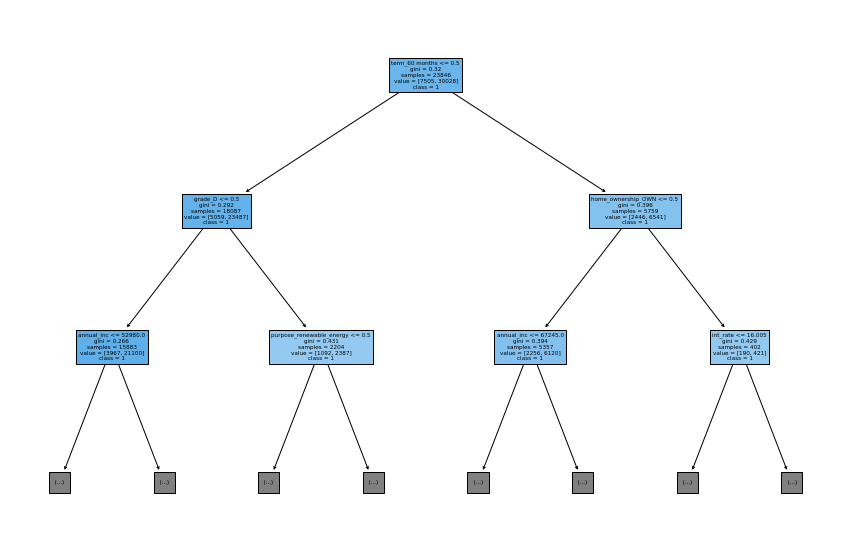

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# create a list with names of predictors, and an array with target categories for plotting
loans_pred_names = list(loans_pred_test)
loans_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
plot_tree(model.estimators_[0], # Pull out one tree from the forest
          max_depth = 2, # will freeze if we try plot all of it!
          feature_names = loans_pred_names,
          class_names = loans_resp_names, 
          filled=True);

In [75]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(loans_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: int_rate                                 Importance: 0.25
Variable: loan_amnt                                Importance: 0.2
Variable: annual_inc                               Importance: 0.18
Variable: log_inc                                  Importance: 0.18
Variable: term_60 months                           Importance: 0.02
Variable: home_ownership_RENT                      Importance: 0.02
Variable: grade_B                                  Importance: 0.01
Variable: grade_C                                  Importance: 0.01
Variable: grade_D                                  Importance: 0.01
Variable: grade_E                                  Importance: 0.01
Variable: grade_F                                  Importance: 0.01
Variable: grade_G                                  Importance: 0.01
Variable: home_ownership_OWN                       Importance: 0.01
Variable: purpose_credit_card                      Importance: 0.01
Variable: purpose_debt_consolidation             